In [138]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm


##Creando datos de distribución log-normal con ajuste a la escala diagramatica

In [139]:
np.random.seed(1001280374)
porc_enf = np.random.lognormal(mean = 0.8, sigma= 3.6, size= 50)*10/230.57275236636877
porc_enf
print(porc_enf.min())
print(porc_enf.max())


0.00017630693666562835
100.00000000000001


##Extrayendo media, mediana, quartiles y percentiles

In [140]:
#Media y mediana
media = porc_enf.mean()
print(media)
mediana = np.median(porc_enf)
print(mediana)



7.487900409580528
0.03917561135696329


In [141]:
#Cuartiles y percentiles
porc_enf_serie = pd.Series(porc_enf)
porc_enf_serie.quantile([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

0.05     0.000661
0.10     0.001506
0.15     0.002792
0.20     0.003936
0.25     0.005949
0.30     0.008847
0.35     0.018681
0.40     0.022516
0.45     0.025273
0.50     0.039176
0.55     0.125703
0.60     0.136628
0.65     0.221510
0.70     0.520111
0.75     1.189248
0.80     4.780379
0.85     9.228978
0.90    13.607142
0.95    63.129747
dtype: float64

##Categorizando la variable según la escala diagramatica del articulo referencia y haciendo representaciones gráficas

In [142]:

cat_enf = []
for pe_i in porc_enf:
  if(pe_i < 4):
    cat_enf.append('N2')
  elif(pe_i < 8):
    cat_enf.append('N4')
  elif(pe_i < 12):
    cat_enf.append('N8')
  elif(pe_i < 27):
    cat_enf.append('N12')
  elif(pe_i < 45):
    cat_enf.append('N27')
  elif(pe_i < 71):
    cat_enf.append('N45')
  elif(pe_i < 93):
    cat_enf.append('N71')
  else:
    cat_enf.append('N93')

cat_enf_serie = pd.Series(cat_enf)
cat_enf_serie.describe()

count     50
unique     6
top       N2
freq      39
dtype: object

In [143]:
cat_enf_serie.value_counts()

N2     39
N8      3
N45     3
N4      2
N12     2
N93     1
dtype: int64

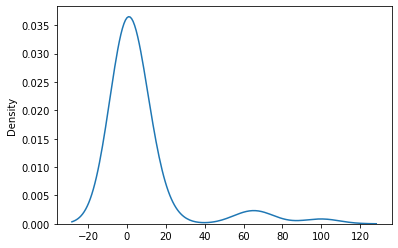

In [144]:
import seaborn as sns
sns.kdeplot(porc_enf)


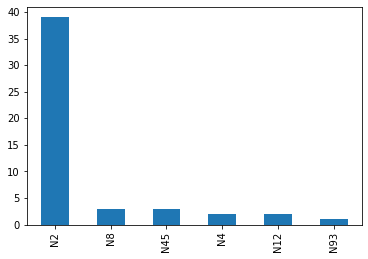

In [150]:
cat_enf_serie.value_counts().plot(kind='bar')

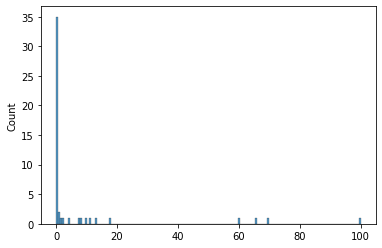

In [149]:
sns.histplot(porc_enf)


##Examinando en que posición debo ubicarme en la escala para estimar la severidad real

In [147]:
cont = cat_enf_serie.value_counts()

# Con el punto de la escala
frec1 = cont*[4, 8, 12, 27, 45, 71]
print(frec1.sum()/50)

# Con el punto medio
frec2 = cont*[2, 4, 6, 13.5, 24.5, 46.5]
print(frec2.sum()/50)

# punto percentil 1%
frec3 = cont*[0.04, 0.08, 0.12, 0.27, 0.45, 0.71]
print(frec3.sum()/50)

8.62
4.61
0.08620000000000001


Conclusión: La mayor densidad de datos corresponde con el valor de la mediana: 0,04 o en su defecto la mayoría son valores que pertenecen al grupo que en la escala corresponde al 2% de severidad. Estimando la severidad con la escala diagramatica se ignora completamente la severidad real, para hallarla hay que considerar valores en la escala menores al percentil 1%. 